In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('temps.csv')

In [54]:
features = df[['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual', 'friend']]

In [55]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 9)


In [56]:
# Descriptive statistics for each column
features = pd.get_dummies(features)

In [59]:
import numpy as np

labels = np.array(features['actual'])

features = features.drop('actual', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [60]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [61]:
print('Training Features Shape:{}'.format(train_features.shape))
print('Training Labels Shape:{}'.format(train_labels.shape))
print('Testing Features Shape:{}'.format(test_features.shape))
print('Testing Labels Shape:{}'.format(test_labels.shape))

Training Features Shape:(278, 14)
Training Labels Shape:(278,)
Testing Features Shape:(70, 14)
Testing Labels Shape:(70,)


In [18]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
baseline_preds

array([66.1, 60.7, 48. , 61. , 70.4, 63. , 77.1, 76.6, 55.6, 68. , 54.2,
       68.3, 45.9, 59.9, 71.5, 49.4, 52.2, 54.5, 51.3, 72.4, 63.3, 50. ,
       69.7, 59.9, 55.2, 48.3, 66.1, 46.5, 65.9, 76. , 59.7, 61.2, 48. ,
       76.5, 77.4, 51.2, 49.6, 48.7, 73.5, 45.1, 61.6, 55.5, 59.4, 46.1,
       57.8, 61.9, 51.5, 76.8, 53.9, 46.4, 45.1, 45.9, 64.9, 66.8, 72.1,
       56.5, 50.1, 54.5, 53.7, 60.5, 68.8, 48.9, 52.4, 70. , 54.3, 56.8,
       73.3, 74. , 76.6, 46. ])

In [22]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)

In [23]:

print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.09


In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)


C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.78 degrees.


In [30]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.02 %.


In [47]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.7
Variable: average              Importance: 0.19
Variable: friend               Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [48]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3.91 degrees.
Accuracy: 93.75 %.


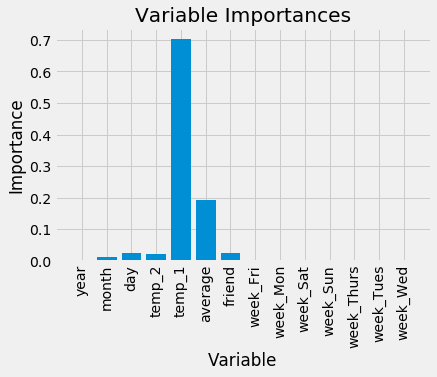

In [49]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


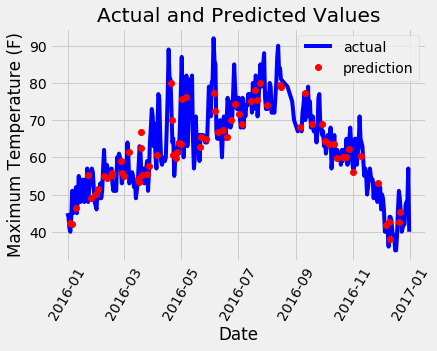

In [50]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

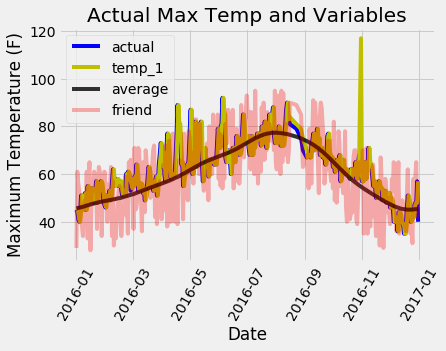

In [52]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

source: 'https://towardsdatascience.com/random-forest-in-python-24d0893d51c0'

In [63]:
import os
os.chdir('C:\\Users\\schen\\Desktop\\DataScience-Python3\\sberbank-russian-housing-market')

In [196]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import  preprocessing # used for label encoding and imputing NaNs
import datetime as dt # we will need this to convert the date to a number of days since some point
from sklearn.tree import export_graphviz

import six
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
dftrain = pd.read_csv('train.csv', parse_dates=['timestamp'])

In [220]:
dftrain.shape

(30471, 292)

In [199]:
dftest = pd.read_csv('test.csv', parse_dates=['timestamp'])

###### Parse Dates could solve the date type problem

In [200]:
dftest.shape
len(dftest.timestamp.unique())

274

In [201]:
id_test = dftest.id

In [202]:
df_train["trainOrTest"] = "train"

In [203]:
df_train = dftrain.drop(["price_doc"], axis=1)

In [204]:
df_test = dftest

In [205]:
df_test["trainOrTest"] = "test"

In [206]:
df_all = pd.concat([df_train, df_test])

C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [207]:
df_all = df_all.drop("id", axis=1)

In [208]:
# Convert the date into a number (of days since some point)
fromDate = min(df_all['timestamp'])

In [209]:
df_all['timedelta'] = df_all['timestamp'] - fromDate

In [210]:
df_all['timedelta'] = (df_all['timestamp'] - fromDate).dt.days.astype(int)
df_all['timedelta']

0          0
1          3
2          7
3         12
4         16
5         17
6         19
7         20
8         21
9         24
10        27
11        27
12        28
13        30
14        30
15        31
16        31
17        31
18        33
19        33
20        33
21        33
22        34
23        34
24        34
25        35
26        37
27        37
28        37
29        38
        ... 
7632    1735
7633    1735
7634    1735
7635    1735
7636    1736
7637    1736
7638    1736
7639    1736
7640    1738
7641    1738
7642    1738
7643    1738
7644    1738
7645    1738
7646    1738
7647    1738
7648    1738
7649    1739
7650    1739
7651    1739
7652    1739
7653    1740
7654    1740
7655    1740
7656    1741
7657    1741
7658    1743
7659    1745
7660    1745
7661    1745
Name: timedelta, Length: 38133, dtype: int32

In [211]:
print(df_all[['timestamp', 'timedelta']].head())
df_all.drop('timestamp', axis = 1, inplace = True)

   timestamp  timedelta
0 2011-08-20          0
1 2011-08-23          3
2 2011-08-27          7
3 2011-09-01         12
4 2011-09-05         16


###### Encoding categorical features

In [212]:
for c in df_all.columns:
    if df_all[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_all[c].values)) 
        df_all[c] = lbl.transform(list(df_all[c].values))

In [213]:
# Create a list of columns that have missing values and an index (True / False)
df_missing = df_all.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
idx_ = df_missing['missing_count'] > 0

In [214]:
df_missing = df_missing.ix[idx_]
cols_missing = df_missing.column_name.values
idx_cols_missing = df_all.columns.isin(cols_missing)
idx_cols_missing 

C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False,

In [215]:
# Instantiate an imputer
imputer = preprocessing.Imputer(missing_values='NaN', strategy = 'most_frequent', axis = 0)

# Fit the imputer using all of our data (but not any dates)
imputer.fit(df_all.ix[:, idx_cols_missing])

# Apply the imputer
df_all.ix[:, idx_cols_missing] = imputer.transform(df_all.ix[:, idx_cols_missing])

C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\schen\AppData\Local\Continuum\anaconda2\envs\ame\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [216]:
df_all

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,water_treatment_km,work_all,work_female,work_male,workplaces_km,young_all,young_female,young_male,zd_vokzaly_avto_km,timedelta
0,18654,8945,9709,23603,11317,12286,9576,4677,4899,17508,...,23.683460,98207,45930,52277,0.884350,21154,10147,11007,14.231961,0
1,13729,6800,6929,17700,8702,8998,6880,3414,3466,15164,...,1.317476,70194,34572,35622,0.686252,15727,7802,7925,9.242586,3
2,11252,5336,5916,14884,7063,7821,5879,2784,3095,19401,...,4.912660,63388,31575,31813,1.510089,13028,6193,6835,9.540544,7
3,24934,12152,12782,32063,15550,16513,13087,6442,6645,3292,...,15.623710,120381,60341,60040,0.622272,28563,13883,14680,17.478380,12
4,11631,5408,6223,15237,7124,8113,5706,2724,2982,5164,...,10.683540,68043,33807,34236,0.892668,13368,6209,7159,1.595898,16
5,4632,2233,2399,5866,2831,3035,2418,1194,1224,4851,...,7.186740,29660,13867,15793,1.042262,5291,2547,2744,5.070197,17
6,4884,2377,2507,6510,3165,3345,2459,1218,1241,19445,...,13.900700,35003,17513,17490,0.544312,5682,2757,2925,3.028547,19
7,18654,8945,9709,23603,11317,12286,9576,4677,4899,17508,...,23.118380,98207,45930,52277,1.098572,21154,10147,11007,14.434462,20
8,12269,5782,6487,15510,7309,8201,6507,3051,3456,17662,...,20.940970,59120,29456,29664,0.256589,13901,6557,7344,7.500715,21
9,17469,8387,9082,22071,10587,11484,9347,4541,4806,15929,...,16.753090,85551,42199,43352,0.150686,19784,9445,10339,10.229145,24


In [223]:
# Prepare separate train and test datasets
idx_train = df_all['trainOrTest'] == 0
idx_test = df_all['trainOrTest'] == 1

x_train = df_all[idx_train]
x_test = df_all[idx_test]

In [224]:
ylog1p_train = np.log1p(dftrain['price_doc'].values)

In [225]:

from sklearn.tree import DecisionTreeClassifier

In [226]:
Model = DecisionTreeRegressor(max_depth = 3)
Model = Model.fit(x_train,ylog1p_train)

In [231]:
ylog_pred = Model.predict(x_train)

In [232]:
np.sqrt(np.mean((ylog_pred - ylog1p_train)**2))

0.5050585292848252

In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [254]:
clf = RandomForestRegressor(n_estimators = 100, 
                              random_state = 2017, 
                              oob_score = True, 
                              max_features = 20,
                              min_samples_leaf = 8)
clf.fit(x_train,ylog1p_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=2017, verbose=0, warm_start=False)

In [255]:
print(clf.feature_importances_)

[1.68448993e-03 7.37799709e-04 8.06818570e-04 9.49230954e-04
 8.71508763e-04 9.42917187e-04 8.82066412e-04 8.34498601e-04
 5.80591722e-04 1.35234900e-03 1.22369057e-03 1.03530756e-03
 8.26628948e-04 9.96353723e-04 9.23992833e-04 8.43136233e-04
 1.22009098e-03 5.62850649e-04 2.42572682e-03 1.50627841e-03
 1.43434633e-03 4.28416356e-04 4.37406825e-03 4.20234889e-04
 1.11274723e-03 4.26424514e-03 4.37797115e-04 6.83549864e-04
 1.30349793e-03 1.39378669e-03 3.60720910e-04 1.24511402e-03
 5.35597732e-03 3.60534258e-03 1.99873824e-05 4.55729162e-05
 4.02607811e-03 3.75331754e-03 1.04774772e-03 1.78862238e-03
 9.81053679e-04 9.75462644e-04 5.38755965e-04 1.51951920e-03
 1.01444929e-03 3.56431540e-05 3.29554976e-04 1.91201090e-04
 2.15000874e-03 8.53459892e-04 4.14784677e-04 6.53900004e-04
 7.24522187e-03 4.65509659e-03 3.39709721e-03 2.26526767e-03
 2.53257441e-03 2.83391951e-03 3.28666671e-03 2.06460311e-03
 4.56361550e-03 2.69176281e-03 3.49480812e-04 1.51829174e-03
 1.75120901e-03 1.199558

In [256]:
clf.oob_prediction_

array([15.38505095, 15.47142122, 15.42483565, ..., 15.58685221,
       15.91773566, 15.44890004])

In [257]:
ylog_pred = clf.predict(x_train)

In [258]:
np.sqrt(np.mean((ylog_pred - ylog1p_train)**2)) # about 0.37 (if you use 100 trees)

0.37292404993319145

In [259]:
np.sqrt(np.mean((clf.oob_prediction_ - ylog1p_train)**2)) # 0.47 slightly better than a simple tree.

0.46806068160999464

website'https://www.kaggle.com/chalkalan/random-forest-tutorial/notebook'